### Logistic Regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (ex what is the probability that this email is spam?). If the estimated probability is greater than 50% then the model predicts that the isntance belongs to that class(called the positive class, labeled "1") and otherwise it predicts that it does not (i.e belongs to the negative class, labeled "0"). This makes it a binary classifier.

### Estimating Probabilities

A logistic regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

Logistic Regression model estimated probability (vectorized form)

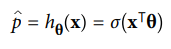

Here sigma is a sigmoid function (i.e S-shaped) that outputs a number between 0 and 1.

It is defined as:-

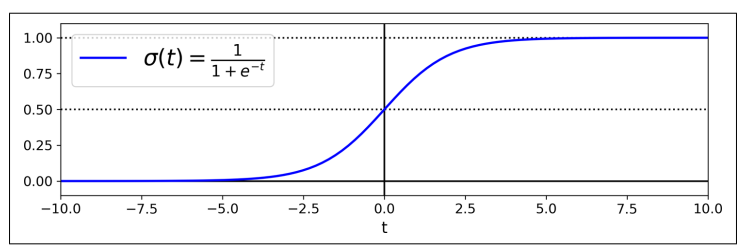

The score t is often called the logit.

The name coes from the fact that the logit function, defined as logit(p)=log(p/(1-p)), is the inverse of the logistic function.

If we compute the logit of the estimated probability p, you will find that the result is t.

The logit is also called the log-odds, since it is the log of the ration between the estimated probability for the positive class and the estimated probability for the negative class.

### Training and Cost Function

The objective of training a logistic regression model is to set the parameter vector theta so that the model estimates high probabilities for positive instances (y=1) and low probabilities for negative instances (y=0).
This idea is captured by the cost function.

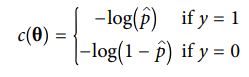

This cost function makes sence because -log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. 

While -log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance.

The cost function over the whole training set is the average cost over all training instances. It can written a single expression called the log loss.

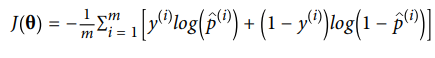

There is no know closed-form equation to compute the value of theta that minimizes this cost function (there is no equivalent of the NOrmal Equation).

This cost function is convex, so Gradient Descent(or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).

The partial derivatives of the cost functino with regard to the jth model parameter theta j are given by

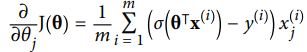

### Decision Boundaries

So we are going to use the iris dataset to illustrate Logistic Regression.

This dataset contains the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris viginica.

Let's try to build a classifier to detect the Iris virginica type based only on the petal width feaure.

In [2]:
from sklearn import datasets #loading the datasets
iris=datasets.load_iris()

In [3]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
import numpy as np
X=iris["data"][:,3:] #petal width
y = (iris["target"] == 2)#if Iris virginica , else 0

In [5]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

Model's estimated probabilities for flowers with petal widths varying from 0cm to 3cm

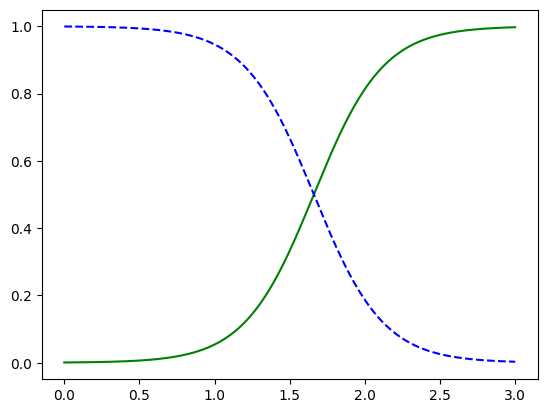

In [6]:
import matplotlib.pyplot as plt
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-",label="Iris virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris virginica")


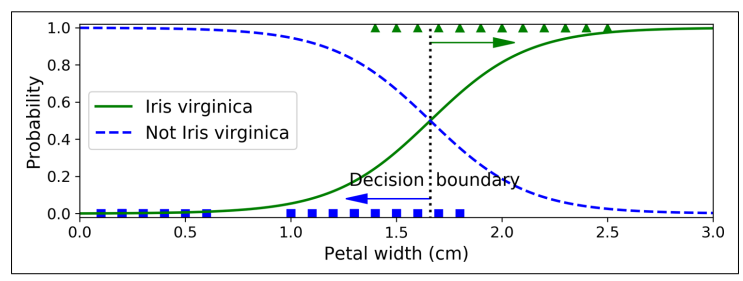

The petal width of Iris virinica flowers(represented by triangles) ranges from 1.4cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm.

Near 2cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability fot that class), while below 1cm it is highly confident that it is not an Iris virginica.

However if we use predict() method rather than predict_proba(), it will return whichever class is most likely. Therefore, there is a decision boundary at around 1.6cm where both probabilities are equal to 50%: if the petal width is higher than 1.6cm, the classifier will predict that the flower is an Iris virginica and otherwise it will predict that it is non(even if it is not very confident)


In [7]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

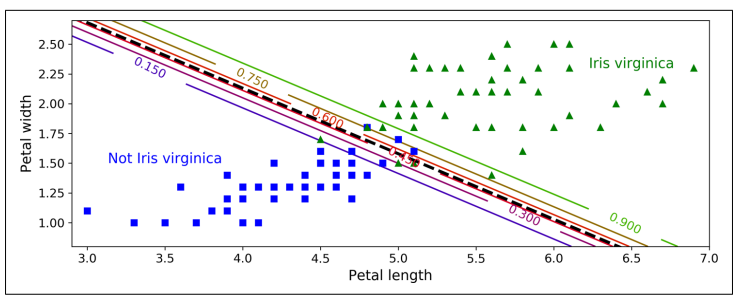

The above image shows the same dataset, but this time displaying two features, petal width and length. Once trained, the logistic regression classifier can, based on these features, estimate the probability that a new flower is an Iris virginica.

The dashed line represents the points where the model estimates a50% probability: this is the model's decision boundary. Note that it is a linear boundary "Each parallel line represents the points where the model outputs a specific probability, from 15%(bottom left) to 90% (top right).

All the flowers beyond the top-right line have an over 90% chance of being Iris virginica, according to the model

### NOTE:-

just like the other linear models, Logistic Regression models can be regularized using l1 or l2 penalties. Scikit-Learn actually adds an l2 penalty by default.

The hyperparameter controlling the regularization strength of a Scikit-learnn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

### Softmax Regression

The logistic Regression model can be generalized to support multiple class directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

When given an instance x, the Softmax Regression model first computes a score for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.

Softmax score for class k

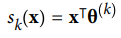

Note that each class has its own dediccated parameter vector theta^k. All these vectors are typically stored as rows in a parameter matrix theta.

Once we have computed the score of every class for the instance x, you can estimate the probability that the instance belongs to class k by running the scores through the softmax function.

The function computes the exponential of every score, then normalizes them (dividing the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).

Softmax function

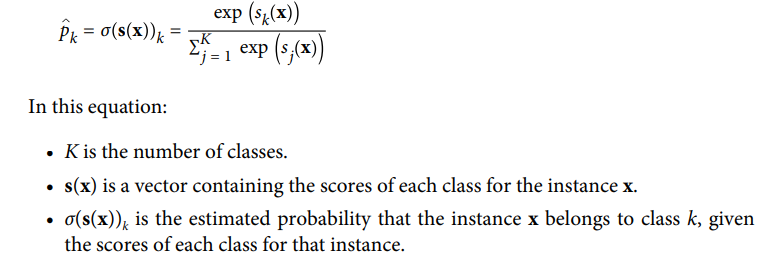

Just like the logistic Regression classifier, the softmax regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

Softmax Regression classifier prediction

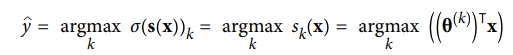

The argmax operator return the value of a variable that maximizes a function. In this equation it returns the value of k that maximizes the estimated probability.

The softmax regression classifier predicts only one class at a time (i.e , it is multiclass, not multioutput), so it should be used only with mutually exclusive classes, such as different types of plants. You cannot use it to recognize multiple people in one picture.

The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function, called the cross entropy should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

Cross entropy cost function

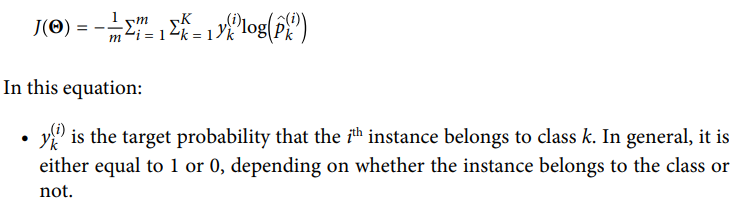

### Note: 
When there are just two classes (k=2), this cost function is equivalent to the Logistic Regression's cost function(log loss).

### Cross Entropy

Cross entropy originated from information theory. Suppose you want to efficiently transmit information about the weather every day. If there are eight option (sunny, rainy etc), you could encode each option using three bits because 2^3 is 8.

However, if you think it will sunny almost every day, it would be much more efficient to code "sunny" on jsut one bit (0) and the other seven options on four bits (starting with 1).

Cross entropy measures the average number of bits you actually send per option. If you assumption about the weather is perfect, cross entropy will be equal to the entropy of the weather itself (i.e, it intrinsic unpredictability). But if your assumptions are wrong (e.g if it rains often), cross entropy will be greater by an amount called the kullback-leibler divergence.

Cross entropy gradient vector for class k

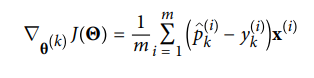

Now we can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix theta that minimizes the cost function.

Let's use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn's Logistic Regression uses one-versus-the-rest by default when you train it on more than two classes, but you can set the multi_class hyperparameter to multinomial to switch it to softmax Regression.
It also applies l2 regularization by default which you can control using the hyperparameter C.

In [8]:
X=iris["data"][:,(2,3)]
y=iris["target"]
softmax_reg=LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [9]:
softmax_reg.predict([[5,2]])

array([2])

In [10]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

So the model is predicting Iris virginica (class2) with 94.2% probability

And Iris versicolor with 5.8% probability

Softmax Regression decision boundaries

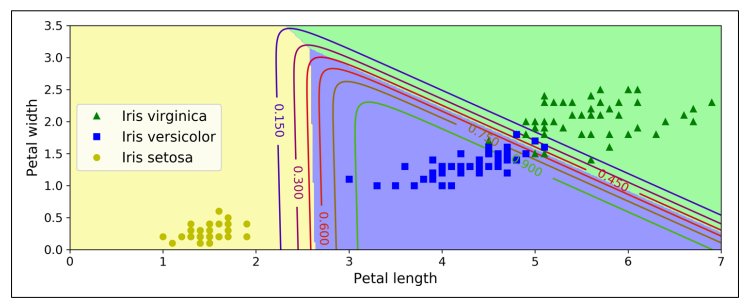

The decision boundaries between any two classes are linear. The figure also shows the probabilities for the Iris versicolor class, represented by the curved lines (e.g, the line labeled with 0.450 represesnts the 45% probability boundary).

The model can predict a class that has a estimated probability below 50%. For ex, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.